In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download rabieelkharoua/asthma-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/asthma-disease-dataset
License(s): Attribution 4.0 International (CC BY 4.0)


In [ ]:
!unzip asthma-disease-dataset.zip

Archive:  asthma-disease-dataset.zip
  inflating: asthma_disease_data.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/asthma_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [ ]:
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
PhysicalActivity,0
DietQuality,0
SleepQuality,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [ ]:
df = df.drop(['PatientID', 'EducationLevel', 'DoctorInCharge'], axis=1)
df.head()

,Age,Gender,Ethnicity,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,0,1,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,1,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,0,2,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,1,2,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,0,0,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,...,0,3.470589,3.067944,1,1,1,0,0,1,0


Diagnosis
0    2268
1     124
Name: count, dtype: int64


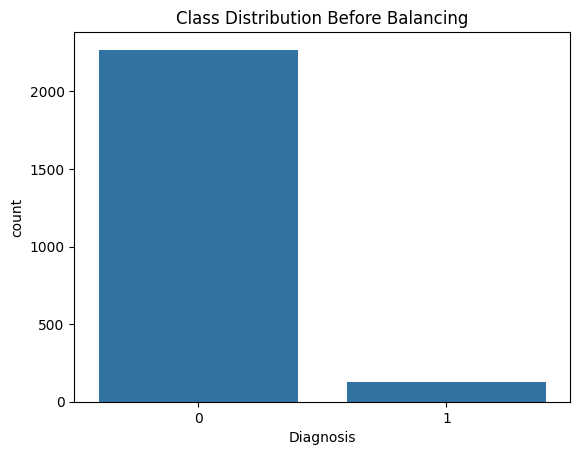

In [ ]:
# Check class distribution
print(df['Diagnosis'].value_counts())
sns.countplot(x='Diagnosis', data=df)
plt.title("Class Distribution Before Balancing")
plt.show()

In [ ]:
from sklearn.utils import resample

# Separate classes
df_majority = df[df['Diagnosis'] == 0]
df_minority = df[df['Diagnosis'] == 1]

# Oversample minority class
df_minority_oversampled = resample(df_minority,
                                   replace=True,
                                   n_samples=len(df_majority),
                                   random_state=42)

# Combine majority class with oversampled minority class
df_balanced = pd.concat([df_majority, df_minority_oversampled])

# Shuffle the data
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print(df_balanced['Diagnosis'].value_counts())


Diagnosis
0    2268
1    2268
Name: count, dtype: int64


Diagnosis
0    2268
1    2268
Name: count, dtype: int64


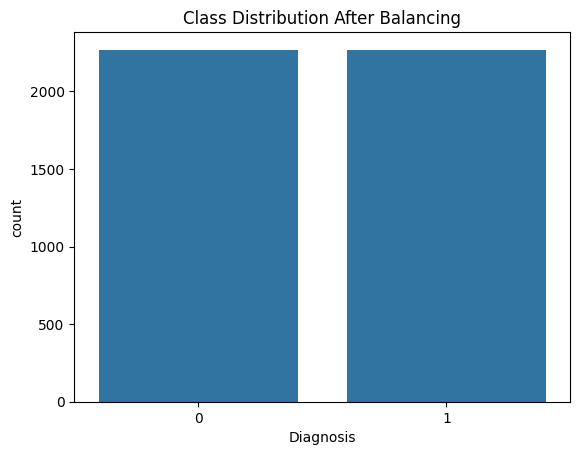

In [ ]:
# Check class distribution
print(df_balanced['Diagnosis'].value_counts())
sns.countplot(x='Diagnosis', data=df_balanced)
plt.title("Class Distribution After Balancing")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_balanced, test_size=0.2, random_state=42)

In [ ]:
x_train = train_data.drop('Diagnosis', axis=1)
y_train = train_data['Diagnosis']
x_test = test_data.drop('Diagnosis', axis=1)
y_test = test_data['Diagnosis']

In [ ]:
train_data['Diagnosis'].value_counts()

,count
Diagnosis,
0,1830
1,1798


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
model.score(x_test, y_test)

0.9658590308370044

In [ ]:
import pickle
import joblib

joblib.dump(model, 'Asthma.pkl')

['Asthma.pkl']

In [ ]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'BMI', 'Smoking', 'PhysicalActivity',
       'DietQuality', 'SleepQuality', 'PollutionExposure', 'PollenExposure',
       'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma',
       'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux',
       'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis'],
      dtype='object')